Họ và Tên: Đào Thanh Thiện

MSSV: 1712782

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Đọc và tiền xữ lý dữ liệu**

In [2]:
#Đọc dữ liệu
data = pd.read_csv("Space_Corrected.csv")
df = data.copy()

In [3]:
#Dữ liệu gốc đặt tên cột bị dư 1 dấu cách, ta chuyển về tên đúng để dễ làm việc hơn
df.rename(columns={" Rocket": "Rocket"}, inplace = True)
df.rename(columns={"Status Rocket": "Status_Rocket"}, inplace = True)
df.rename(columns={"Status Mission": "Status_Mission"}, inplace = True)

In [4]:
#Ta thấy dữ liệu có 2 cột "Unnamed: 0" và "Unnamed: 0.1" có cùng số giá trị với cột số thứ tự của pandas 
#nên ta tiến hành bỏ 2 cột này, để rút gọn dữ liệu
df = df.drop(["Unnamed: 0", "Unnamed: 0.1"], axis = 1)

#Cột Rocket có nhiều dữ liệu trống, ta đặt các dữ liệu này trở về 0
df['Rocket'] = df['Rocket'].fillna(0)

#Thêm cột Country, lấy dữ liệu từ cột location
df['Country'] = df['Location'].apply(lambda x: x.strip().split(', ')[-1])

In [11]:
df

,Company Name,Location,Datum,Detail,Status_Rocket,Rocket,Status_Mission,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,0,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,0,Success,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,0,Failure,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,0,Success,Kazakhstan


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status_Rocket   4324 non-null   object
 5   Rocket          4324 non-null   object
 6   Status_Mission  4324 non-null   object
 7   Country         4324 non-null   object
dtypes: object(8)
memory usage: 270.4+ KB


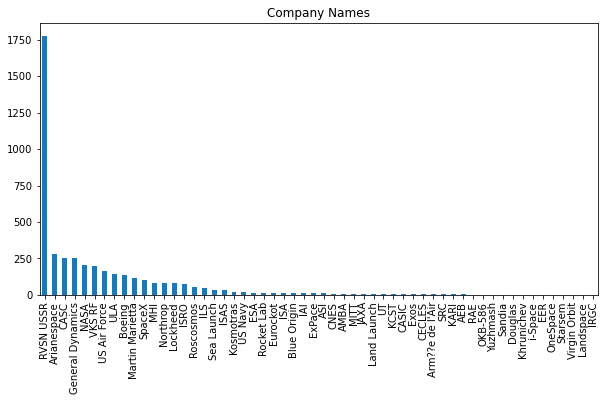

In [7]:
df['Company Name'].value_counts().plot.bar(figsize=(10,5),title='Company Names')

In [13]:
df['Company Name'].value_counts()

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ESA                   13
Rocket Lab            13
Eurockot              13
ISA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


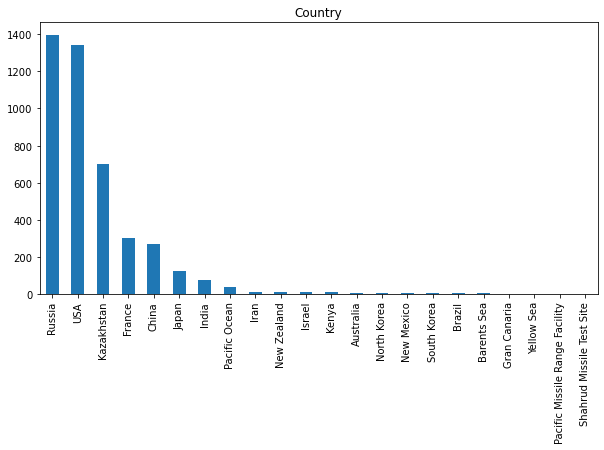

In [10]:
df['Country'].value_counts().plot.bar(figsize=(10,5),title='Country')